<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


For the "Median value of owner-occupied homes" provide a boxplot

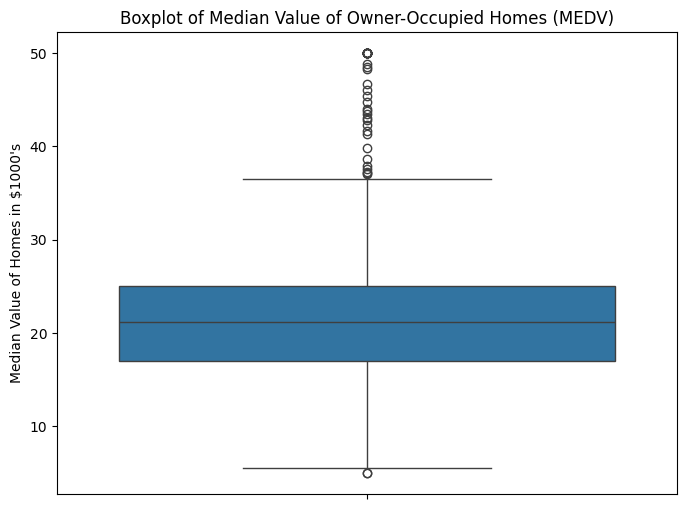

In [7]:
# Create a boxplot for the 'MEDV' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value of Homes in $1000\'s')
plt.show()

The median of the value of owner-occupied homes is roundly 21. There are many outliers in its values

Provide a  bar plot for the Charles river variable

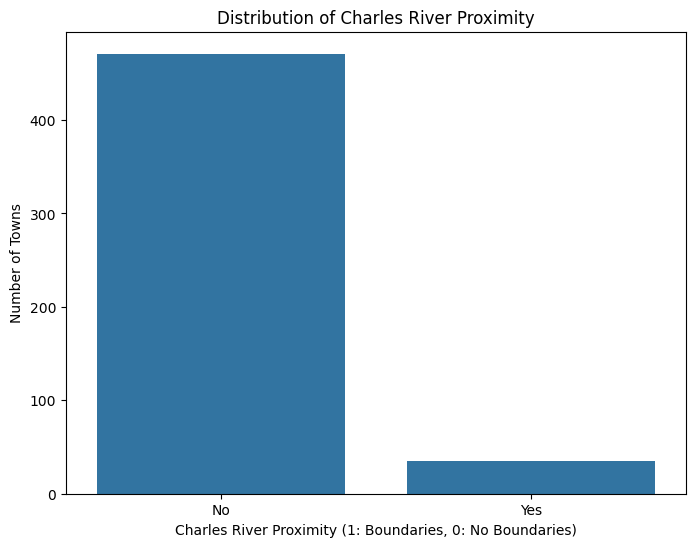

In [8]:
# Count the occurrences of each value in the 'CHAS' column
chas_counts = boston_df['CHAS'].value_counts().reset_index()
chas_counts.columns = ['CHAS', 'Count']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='CHAS', y='Count', data=chas_counts)
plt.title('Distribution of Charles River Proximity')
plt.xlabel('Charles River Proximity (1: Boundaries, 0: No Boundaries)')
plt.ylabel('Number of Towns')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

Most of the houses don't have boundaries to Charles River

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

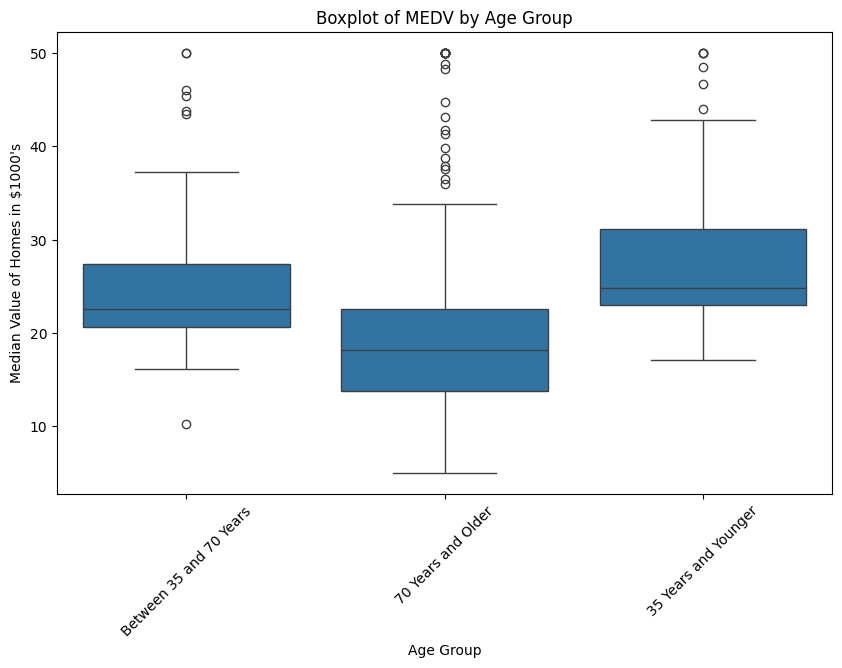

In [9]:
# Discretize the AGE variable into three groups
def categorize_age(age):
    if age <= 35:
        return '35 Years and Younger'
    elif 35 < age <= 70:
        return 'Between 35 and 70 Years'
    else:
        return '70 Years and Older'

boston_df['AGE_GROUP'] = boston_df['AGE'].apply(categorize_age)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Homes in $1000\'s')
plt.xticks(rotation=45)
plt.show()

The younger is a person, the lower the median of the value of the house

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

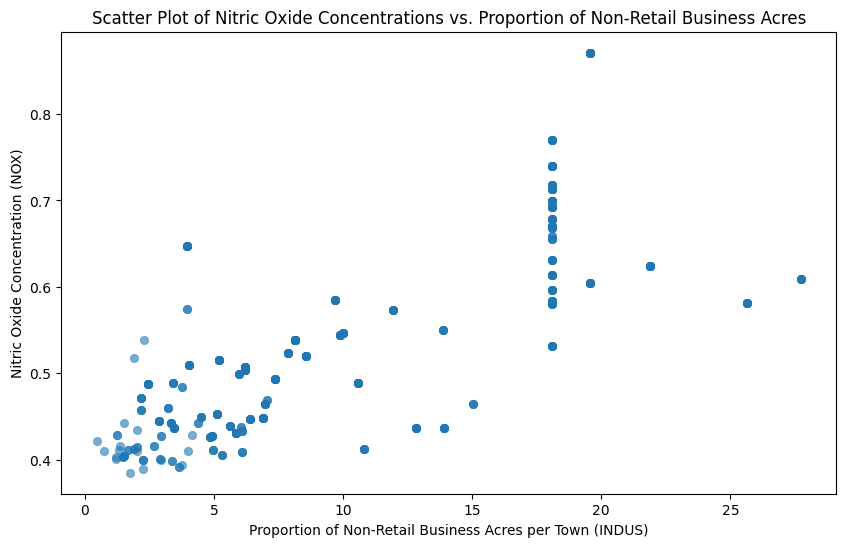

In [10]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.6, edgecolor=None)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

Trend Analysis: Look for any visible pattern or trend in the scatter plot. A trend might indicate a correlation between INDUS and NOX.

Create a histogram for the pupil to teacher ratio variable

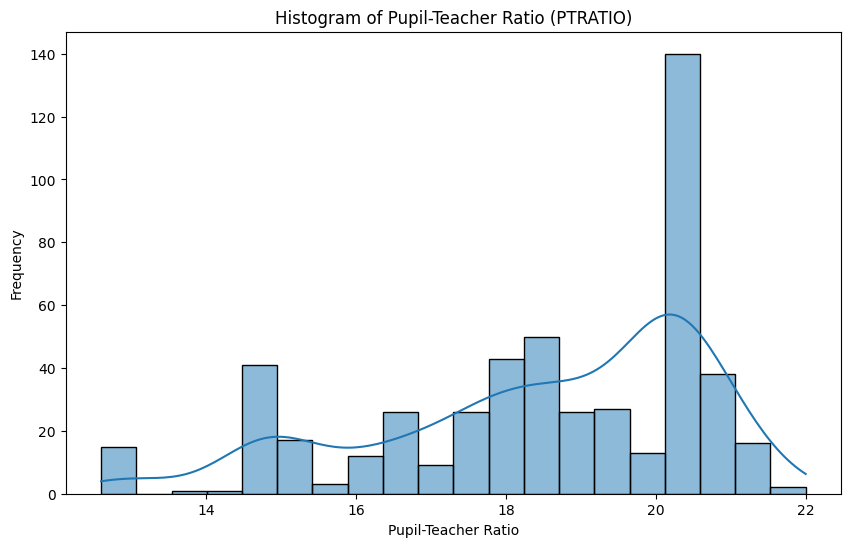

In [11]:
# Create a histogram for the 'PTRATIO' column
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Lets set our hypothesis:

H0: Median value has no significant difference between houses bounded by the Charles river.

H1: Median value has a significant difference between houses bounded by the Charles river.

In [12]:
# Separate the data into two groups based on the 'CHAS' variable
group_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the independent samples t-test
t_stat, p_value = scipy.stats.ttest_ind(group_chas_1, group_chas_0, equal_var=False)  # Use equal_var=False if variances are not assumed to be equal

# Print the test statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 3.113291312794837
P-value: 0.003567170098137517


Since the p-value (0.003) is less than α (0.05), we reject the null hypothesis (H₀).
This suggests there is a significant difference in the median value of houses bounded by the Charles River compared to those that are not.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: There's not difference in median values of houses for each proportion of owner occupide units built prior to 1940.

H1: There IS a difference in median values of houses for each proportion of owner occupide units built prior to 1940.

In [16]:
# Perform ANOVA
groups = [boston_df[boston_df['AGE_GROUP'] == group]['MEDV'] for group in boston_df['AGE_GROUP'].unique()]
f_stat, p_value = scipy.stats.f_oneway(*groups)

# Print the ANOVA results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


As the p-value is less than α (0.05), we reject the null hypothesis (H₀). This means there is a significant difference in the median values of houses across the different age groups.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [14]:
# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


As the p-value is much less than 0.05, we reject the null hypothesis.
Thus, there is a significant positive linear relationship between nitric oxide concentrations and the proportion of non-retail business acres per town

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: There is no an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [15]:
# Define the independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable to include the intercept in the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        16:45:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

The regression analysis shows that an additional unit of weighted distance to the five Boston employment centers (DIS) is associated with an increase of approximately $1,091.60 in the median value of owner-occupied homes (MEDV). The effect is statistically significant, meaning this relationship is unlikely to be due to random chance. However, the low R-squared value suggests that there are additional factors influencing MEDV beyond just the distance to employment centers.

The statistically significant p-value confirms that this relationship is unlikely to be due to random chance and is a robust finding.